# TEXT ANALYSIS using NAIVE BAYES Classifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup # for removing HTML tags
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Datasets\IMDB Dataset\IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df.shape

(50000, 2)

In [4]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Data Text Preprocessing

## 1) Remove HTML tags and square brackets

In [5]:
# Create function to remove HTML tags

def stripHTML(text):
    soup = BeautifulSoup(text, 'html.parser')  # 'html.parser' function used to remove HTML tags
    return soup.get_text()

In [6]:
stripHTML("<HI>Hi this is HTML_tags_</H1>")

'Hi this is HTML_tags_'

In [7]:
# Create function to remove square bracets

def removeSqBts(text):
    return re.sub(r'\[[^\]]*\]', '', text)

In [8]:
removeSqBts("This is a sample [text] with [square brackets] containing some information.")

'This is a sample  with  containing some information.'

In [9]:
# Create master which is combination of 'stripHTML' & 'removeSq8Bts' Function

def denoiseText(text):
    text = stripHTML(text)
    text = removeSqBts(text)
    return text

In [10]:
df['review'] = df['review'].apply(denoiseText)

## 2) Remove special characters

In [11]:
# Create function to remove special characters

def removeSplCh(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

In [12]:
df['review'] = df['review'].apply(removeSplCh)

In [13]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


## 3) Stemming 
Stemming is a natural language processing technique that reduces words to their base or root form, even if the root form is not a valid word.

Stemming aims to remove suffixes and prefixes from words so that different forms of the same word are treated as the same word.

In [14]:
# Create function for stemming

def myStemmer(text):
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [15]:
df['review'] = df['review'].apply(myStemmer)

In [16]:
df.head()

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,a wonder littl product the film techniqu is ve...,positive
2,i thought thi wa a wonder way to spend time on...,positive
3,basic there a famili where a littl boy jake th...,negative
4,petter mattei love in the time of money is a v...,positive


## 5) Remove Stop Words and convert corpus into lower case


In [17]:
stopwordList = nltk.corpus.stopwords.words("english")
print(stopwordList)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
stop = set(stopwords.words("english"))

In [19]:
def removeStopWords(text):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens] # '.strip' function removes extra spaces
    filteredTokens = [token for token in tokens if token.lower() not in stopwordList] # '.lower' function convert tokens into lower case
    filteredText = " ".join(filteredTokens) 
    return filteredText

In [20]:
df['review'] = df['review'].apply(removeStopWords)

In [21]:
df.head()

,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic famili littl boy jake think zombi hi clo...,negative
4,petter mattei love time money visual stun film...,positive


## 6) Word cloud of each category of target variable

### (I) Word Cloud of 'Positive' Sentiment

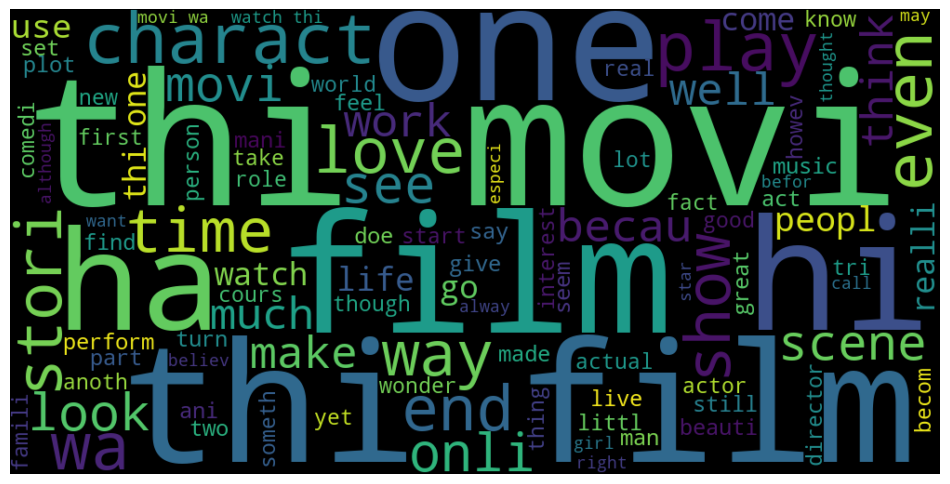

In [22]:
plt.figure(figsize=(12, 12))

dfPosReview = df[df['sentiment'] == 'positive']
posText = " ".join(review for review in dfPosReview.review)

WC = WordCloud(width=1000, height=500, max_words=100)
posWords = WC.generate(posText)

plt.imshow(posWords, interpolation="bilinear")
plt.axis('off')  # Turn off axes
plt.show()

### (II) Word Cloud of 'negative' Sentiment

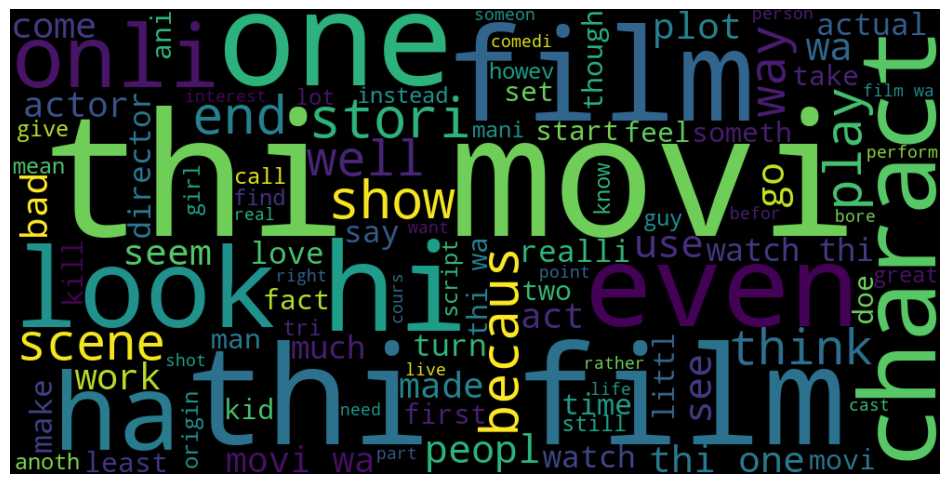

In [23]:
plt.figure(figsize=(12, 12))

dfPosReview = df[df['sentiment'] == 'negative']
posText = " ".join(review for review in dfPosReview.review)

WC = WordCloud(width=1000, height=500, max_words=100)
posWords = WC.generate(posText)

plt.imshow(posWords, interpolation="bilinear")
plt.axis('off')  # Turn off axes
plt.show()

**Some words are not valid words becuase we apply stemming.**

# Divide data into train and test set

In [24]:
xTrain, xTest, yTrain, yTest = train_test_split(df.review, df.sentiment, test_size=0.25)

In [25]:
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((37500,), (12500,), (37500,), (12500,))

# Feature Encoding using N-Gram & TF-IDF

In [26]:
# Convert text into vectors using N-Gram

cv = CountVectorizer(
    max_df=1.0,  # Change max_df value to your desired value (e.g., 1.0 for no maximum)
    binary=False,
    ngram_range=(1, 3)  # Change ngram_range to your desired range (e.g., (1, 3) for unigrams, bigrams, and trigrams)
)

cvTrainReviews = cv.fit_transform(xTrain)
cvTestReviews = cv.transform(xTest)

In [27]:
cvTrainReviews.shape, cvTestReviews.shape

((37500, 6586551), (12500, 6586551))

### We build 2 models, one using 'N-Gram' and one using 'TF-IDF'

In [28]:
# Convert text into vectors using TF-IDF

tf = TfidfVectorizer(
    min_df=0,  # Minimum document frequency
    max_df=1,  # Maximum document frequency
    use_idf=True,
    ngram_range=(1, 3)  # n-gram range (e.g., unigrams, bigrams, trigrams)
)

tfTrainReviews = tf.fit_transform(xTrain)
tfTestReviews = tf.transform(xTest)

In [29]:
tfTrainReviews.shape, tfTestReviews.shape

((37500, 5857450), (12500, 5857450))

# Model Building

## (I) Fit the Naive Bayes classifier using CountVectorizer features (N-Gram)

In [43]:
mnbCV = MultinomialNB()  

mnbCV = mnbCV.fit(cvTrainReviews, yTrain)  

## (II) Fit the Naive Bayes classifier using TF-IDF Vectorizer features

In [44]:
mnbTFIDF = MultinomialNB()  

mnbTFIDF = mnbTFIDF.fit(tfTrainReviews, yTrain)  # Fit the Naive Bayes classifier using TF-IDF Vectorizer features

# Model evaluation

## (I) Predictions on Test Data

In [45]:
cvPredicted = mnbCV.predict(cvTestReviews)
cvPredicted

array(['negative', 'positive', 'negative', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

In [47]:
tfidPredicted = mnbTFIDF.predict(tfTestReviews)
tfidPredicted

array(['negative', 'positive', 'negative', ..., 'positive', 'positive',
       'negative'], dtype='<U8')

## (II) Accuracy score of Test Data

In [48]:
cvScore = accuracy_score(yTest, cvPredicted)
print("Accuracy using CountVectorizer:", cvScore)

Accuracy using CountVectorizer: 0.88248


In [50]:
tfidfScore = accuracy_score(yTest, tfidPredicted)
print("Accuracy using TF-IDF Vectorizer:", tfidfScore)

Accuracy using TF-IDF Vectorizer: 0.74632


**N-Grams gives better result.**

## (III) Confusion Matrix of Test Data

In [51]:
CVCM = confusion_matrix(yTest, cvPredicted)

print("Confusion Matrix using CountVectorizer:")
print(CVCM)

Confusion Matrix using CountVectorizer:
[[5597  644]
 [ 825 5434]]


In [52]:
tfidfCM = confusion_matrix(yTest, tfidPredicted)

print("Confusion Matrix using TF-IDF Vectorizer:")
print(tfidfCM)

Confusion Matrix using TF-IDF Vectorizer:
[[4740 1501]
 [1670 4589]]


**In this problem statement, false positive is more risky because we are dealing with IMDb reviews. It is very difficult to get positive reviews from clients. A false positive is when a model predicts a positive review as negative. This is not good because IMDb works hard to collect positive reviews, and the model is predicting them as negative. This reduces the number of positive reviews, which is not good from a human perspective. False negative is less risky. Therefore, our focus is to reduce false positive and increase precision.**